# Module 03: EDA

In [2]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split 
from ISLP import load_data

# set seed
seed = 2323

### We'll use the _Hitters_ data from ISLP for this activity. The metadata for _Hitters_ can be found [here](https://intro-stat-learning.github.io/ISLP/datasets/Hitters.html).

In [3]:
# Load the data
Hitters = load_data('Hitters')

### Determine the number of rows and columns in the dataset by returning its "shape" attribute

In [4]:
Hitters.shape

(322, 20)

### Determine whether each feature is numeric or categorical by returning the "dtype" attribute for each column

In [5]:
for col in Hitters.columns:
    print(Hitters[col].dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
category
category
int64
int64
int64
float64
category


### Before doing any other analyses, let's create training and test sets.

In [15]:
Train, Test = train_test_split(Hitters, 
                               random_state=seed, 
                               test_size=0.40, 
                               shuffle=True) 

x_train = Train.drop("Salary", axis = 1)
y_train = Train["Salary"]

x_test = Test.drop("Salary", axis = 1)
y_test = Test["Salary"]

### Based on the metadata, what is the difference between the 6 columns starting with 'C' and the 6 related columns that don't?

The difference is that the first 6 columns with 'C' cover the stats of the baseball player's entire career. The 6 related columns cover the data at a specfic time (1986).

### On the training set, create pairwise scatterplots for each of these 6 columns with the 'Salary' variable.

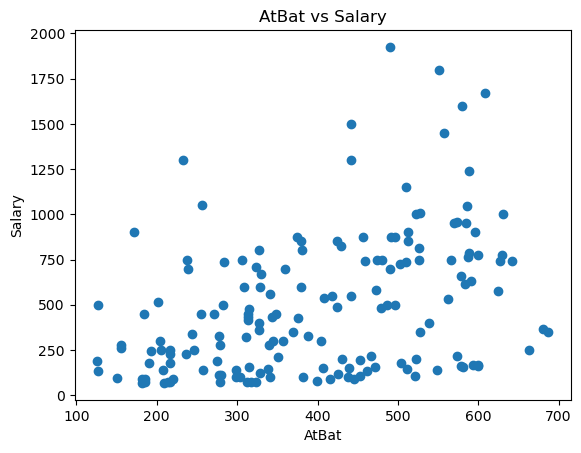

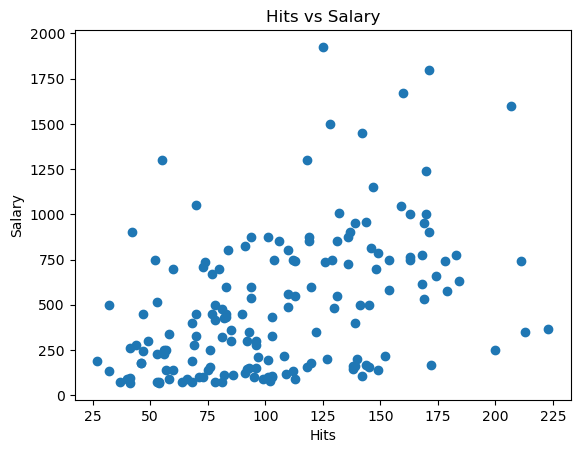

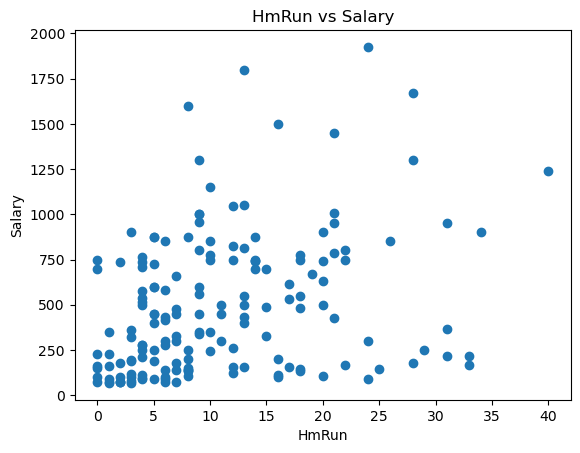

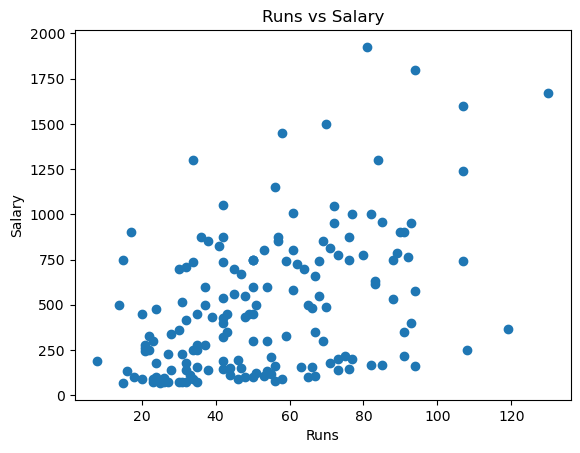

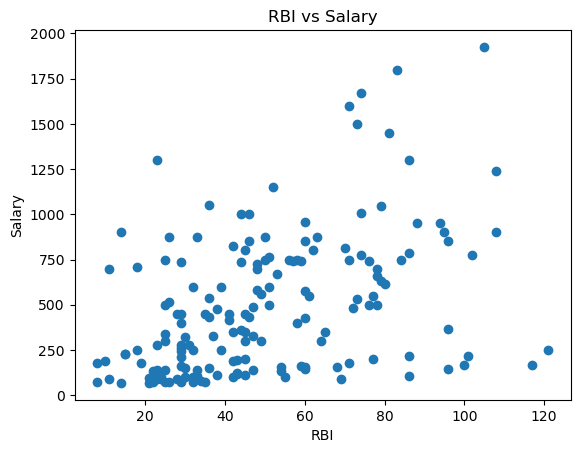

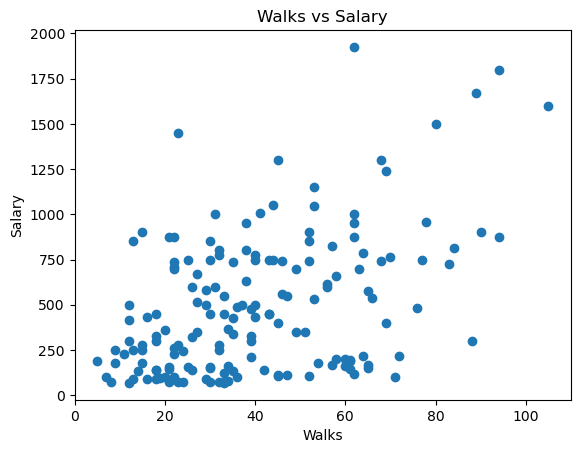

In [16]:
cols = ["AtBat","Hits","HmRun","Runs","RBI","Walks"]

for col in cols:
    plt.figure()
    plt.scatter(x_train[col], y_train)
    plt.xlabel(col)
    plt.ylabel("Salary")
    plt.title(f"{col} vs Salary")
    plt.show()

### Use the "describe" method to determine the mean, standard deviation, and 5 number summary of all numeric variables in the training subset of _Hitters_.

In [31]:
Hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


### It looks like the mean and median of 'AtBat' are nearly equal. This _might_ suggest that this variable is normally distributed. Create a histogram of 'AtBat' to check this hypothesis.

<Axes: >

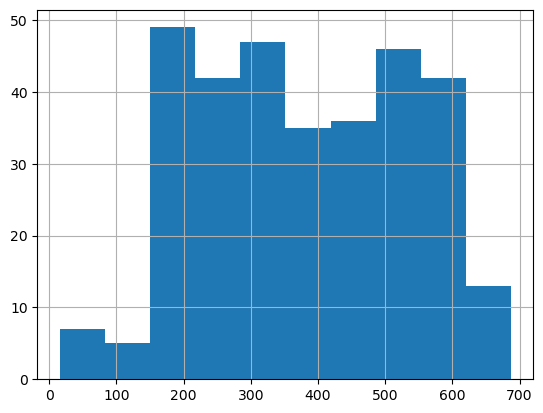

In [ ]:
Hitters["AtBat"].hist()

### Let's standardize the AtBat feature (i.e., normalize by z-scores). We'll create a new column in the training data called 'AtBat_st' to represent this.

In [97]:
Train["AtBat_st"] = (Train["AtBat"] - Train["AtBat"].mean()) / (Train["AtBat"].std())

### How many rows have an 'AtBat' value within the first standard deviation?

Hint: the 'len' magic method returns the number of rows of a dataFrame.

In [95]:
mean = x_train["AtBat"].mean()
std = x_train["AtBat"].std(ddof = 0)

count = 0
for row in x_train["AtBat"]:
    if (row >= (mean-std)) and (row <= (mean+std)):
        count += 1
print(count)

115


### Going back to the results of the 'describe' method, how can you tell that the 'Salary' variable has missing values?

The output shows that "count" for the "Salary" column is lower than the rest of the other columns. Since "count" represent the # of non-missing values, it indicates that "Salary" is missing some values.

### Describe a situation where a variable could have missing values but this would not be reflected in the results of the 'describe' method.

A situation where missing entries are filled in with values such as 0 or Boolean values would not be reflected in the output of the describe method. Since these values are treated as valid data rather than missing, describe would still count them even though they may actually represent missing information.

### On the training data, create separate boxplots of the 'AtBat' variable for when 'Salary' is populated or missing.

C:\Users\phanm\AppData\Local\Temp\ipykernel_46748\3897698354.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([atbat_salary_populated, atbat_salary_missing], labels = ["populated", "missing"])


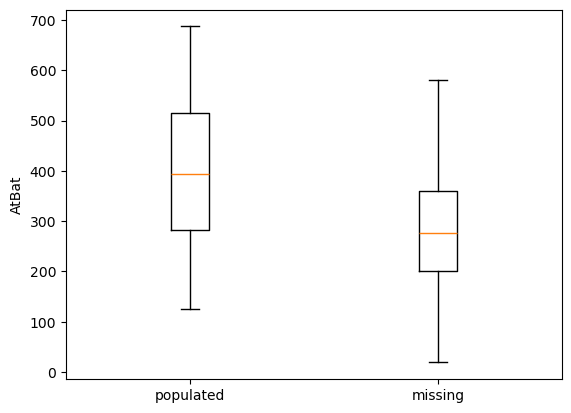

In [87]:
atbat_salary_populated = x_train.loc[y_train.notna(), "AtBat"]
atbat_salary_missing = x_train.loc[y_train.isna(), "AtBat"]

plt.boxplot([atbat_salary_populated, atbat_salary_missing], labels = ["populated", "missing"])
plt.ylabel("AtBat")
plt.show()


### Create a correlation matrix for all numeric features in the training set

In [54]:
Train.corr(numeric_only = True)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,AVG
AtBat,1.000000,0.963324,0.540323,0.906579,0.798717,0.631824,-0.039232,0.126602,0.146763,0.150166,0.164892,0.145779,0.056578,0.345879,0.363085,0.368162,0.401390,0.279178
Hits,0.963324,1.000000,0.516853,0.914739,0.795316,0.605876,-0.028717,0.133316,0.163329,0.136865,0.175542,0.153011,0.065178,0.312858,0.310422,0.301725,0.432558,0.500217
HmRun,0.540323,0.516853,1.000000,0.618439,0.840613,0.385425,0.009072,0.078981,0.076914,0.411917,0.110767,0.218285,0.080296,0.222084,-0.069088,0.062840,0.326021,0.155484
Runs,0.906579,0.914739,0.618439,1.000000,0.786635,0.711346,-0.069584,0.083770,0.103859,0.160979,0.159683,0.115628,0.099025,0.289952,0.184714,0.217297,0.441499,0.387696
RBI,0.798717,0.795316,0.840613,0.786635,1.000000,0.553527,0.046705,0.165837,0.180526,0.375072,0.191452,0.285074,0.117109,0.323825,0.138896,0.217983,0.414623,0.335976
Walks,0.631824,0.605876,0.385425,0.711346,0.553527,1.000000,0.037943,0.137157,0.147019,0.194766,0.205250,0.167453,0.312812,0.317000,0.139008,0.160753,0.458462,0.178337
Years,-0.039232,-0.028717,0.009072,-0.069584,0.046705,0.037943,1.000000,0.925308,0.906857,0.730478,0.882559,0.882835,0.836809,0.071301,-0.091915,-0.160476,0.541390,0.031276
CAtBat,0.126602,0.133316,0.078981,0.083770,0.165837,0.137157,0.925308,1.000000,0.995185,0.775167,0.979705,0.948617,0.894573,0.120875,-0.000507,-0.068187,0.616677,0.079369
CHits,0.146763,0.163329,0.076914,0.103859,0.180526,0.147019,0.906857,0.995185,1.000000,0.761920,0.983128,0.945002,0.883547,0.132818,-0.003372,-0.062669,0.629875,0.116300
CHmRun,0.150166,0.136865,0.411917,0.160979,0.375072,0.194766,0.730478,0.775167,0.761920,1.000000,0.782490,0.912134,0.750795,0.126756,-0.129640,-0.141514,0.616170,0.047935


### Propose two different ways of imputing the missing values of Salary while taking advantage of the information given in the boxplots or the correlation matrix.

One way to impute missing Salary values is to use variables that are strongly correlated with Salary, such as AtBat, Hits, or Runs, based on the correlation matrix. Using players with known salaries, we could estimate missing Salary values by modeling the relationship between Salary and these features or by assigning an average Salary for players with similar values. Another approach is to use the boxplots comparing AtBat when Salary is present versus missing. Since players with missing Salary tend to have lower AtBat values, we could impute Salary using a lower central value, like the median Salary for players with similar AtBat ranges, instead of using the overall average.

### For our last exercise, we'll explore Hits and Walks relative to AtBat totals. 
- Use the sum function to calculuate the totals of each of these three variables for the 1986 season (on the training set). 
- Create a pie chart which shows total hits, total walks, and remaining total (neither) as percents of the At Bats total (on the training set). 

In [ ]:
TotHits = Train["Hits"].sum()
TotWalks = Train["Walks"].sum()
TotAtBat = Train["AtBat"].sum()

Labels = ['Hits', 'Walks', 'Neither']
Totals = [TotHits, TotWalks, TotAtBat-TotHits-TotWalks]

<function matplotlib.pyplot.show(close=None, block=None)>

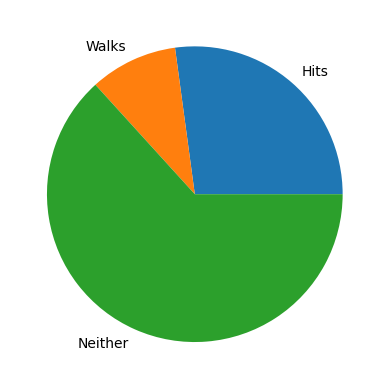

In [86]:
# pie chart
plt.pie(Totals, labels = Labels)
plt.show

### The previous two cells gave us totals across all players. For each player in the training set, calculate the Hits as a percent of AtBat and store it in a new variable called 'AVG'

In [57]:
Train["AVG"] = (Train["Hits"] / Train["AtBat"])

### Using 0.25 and 0.31 as the split points, create a new variable with three bins: high, medium, and low. 

In [58]:
Train['AVG_bin'] = 'medium'
Train['AVG_bin'][Train["AVG"] < 0.25] = 'low'
Train['AVG_bin'][Train["AVG"] > 0.31] = 'high'

C:\Users\phanm\AppData\Local\Temp\ipykernel_46748\1218831102.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Train['AVG_bin'][Train["AVG"] < 0.25] = 'low'
C:\Users\phanm\AppData\Local\Temp\ipykernel_46748\1218831102.py:2: SettingWithCopy

### Create a bar chart that displays the number of players in each of the low, medium, and high categories (for the training data).

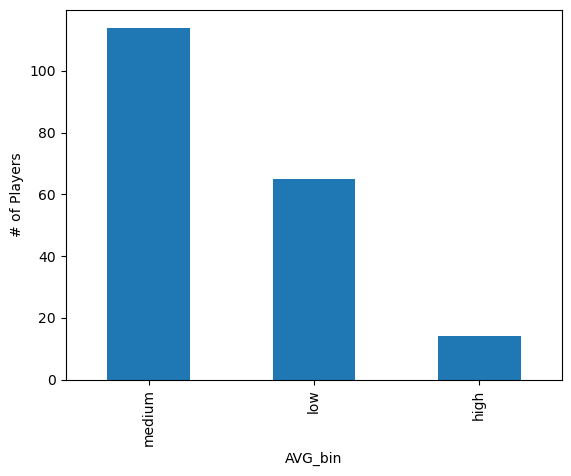

In [91]:
Train['AVG_bin'].value_counts().plot(kind = "bar")
plt.ylabel("# of Players")
plt.show()

Notice that the order of the bars will be medium, low, high. That's counterintuitive. We can reorder these quickly. 

In [62]:
indexMap = ['low', 'medium', 'high']
reordered_list = [Train['AVG_bin'].value_counts()[i] for i in indexMap]

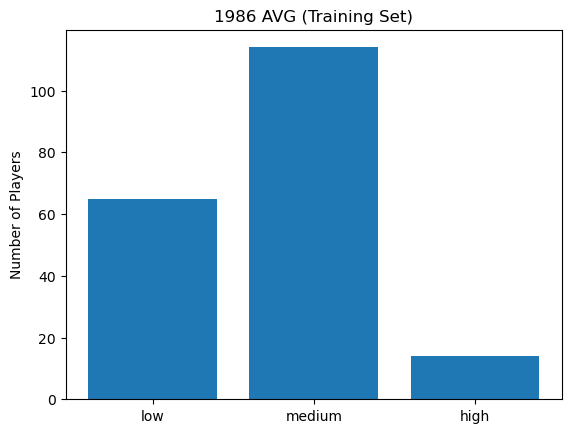

In [71]:
plt.bar(indexMap, reordered_list)

plt.title("1986 AVG (Training Set)")
plt.ylabel("Number of Players")

plt.xticks(indexMap)

plt.show()

### Did we use the depth method or width method for creating these bins? Explain.

We used the width method because it creates bins using fixed value ranges, while the depth method creates bins by splitting the observations into an equal number per bin.